In [20]:
import pandas as pd
from functools import reduce

In [34]:
business = pd.read_csv('./data/business.csv')
attributes = pd.read_csv('./data/atributtes_clean.csv', low_memory=False)
categories = pd.read_csv('./data/categories_fixed.csv')
hours = pd.read_csv('./data/hours_fixed.csv')
gps = pd.read_csv('./data/gps_clustering.csv')
checkins = pd.read_csv('./data/n_checkins.csv')
top_tips = pd.read_csv('./data/top_tips.csv')
#metrics = pd.read_csv('./data/crude_metrics.csv')
target = pd.read_csv('./data/target.csv')

In [27]:
business

,business_id,name,postal_code,latitude,longitude,stars,review_count,is_open
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",93101,34.426679,-119.711197,5.0,7,0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,63123,38.551126,-90.335695,3.0,15,1
2,tUFrWirKiKi_TAnsVWINQQ,Target,85711,32.223236,-110.880452,3.5,22,0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,19107,39.955505,-75.155564,4.0,80,1
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,18054,40.338183,-75.471659,4.5,13,1
...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,T6J 5H2,53.468419,-113.492054,3.0,13,1
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,37204,36.115118,-86.766925,4.0,5,1
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,46250,39.908707,-86.065088,3.5,8,1
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,62025,38.782351,-89.950558,4.0,24,1


In [28]:
attributes

,good_ambience,garage,BusinessAcceptsCreditCards,RestaurantsPriceRange2,BikeParking,WiFi,delivery,GoodForKids,OutdoorSeating,RestaurantsReservations,HasTV,RestaurantsGoodForGroups,Alcohol,ByAppointmentOnly,Caters,RestaurantsAttire,NoiseLevel,meal_diversity,business_id
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Pns2l4eNsfO8kk83dixA6A
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,mpf3x-BjTdTEA3yCZrAYPw
2,0,0,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,tUFrWirKiKi_TAnsVWINQQ
3,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,MTSW4McQd7CbVtyjqoe9mw
4,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,mWMc6_wTdE0EUBKIGXDVfA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,IUQopTMmYQG-qRtBk-8QnA
150342,0,0,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,c8GjPIOTGVmIemT7j5_SyQ
150343,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,_QAMST-NrQobXduilWEqSw
150344,0,0,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,mtGm22y5c2UHNXDFAjaPNw


In [29]:
categories

,Restaurants,Food,Shopping,Home Services,Beauty & Spas,Nightlife,Health & Medical,Local Services,Bars,Automotive,total_categories,business_id
0,0,0,0,0,0,0,1,0,0,0,6,Pns2l4eNsfO8kk83dixA6A
1,0,0,0,0,0,0,0,1,0,0,5,mpf3x-BjTdTEA3yCZrAYPw
2,0,0,1,0,0,0,0,0,0,0,6,tUFrWirKiKi_TAnsVWINQQ
3,1,1,0,0,0,0,0,0,0,0,5,MTSW4McQd7CbVtyjqoe9mw
4,0,1,0,0,0,0,0,0,0,0,3,mWMc6_wTdE0EUBKIGXDVfA
...,...,...,...,...,...,...,...,...,...,...,...,...
150238,0,0,0,0,1,0,0,0,0,0,2,IUQopTMmYQG-qRtBk-8QnA
150239,0,0,1,0,0,0,0,0,0,0,7,c8GjPIOTGVmIemT7j5_SyQ
150240,0,0,1,0,1,0,0,0,0,0,7,_QAMST-NrQobXduilWEqSw
150241,0,0,1,0,0,0,0,0,0,0,5,mtGm22y5c2UHNXDFAjaPNw


In [30]:
hours

,business_id,7days,weekends,n_open_days,mean_total_hours_open,mean_open_hour,mean_close_hour
0,Pns2l4eNsfO8kk83dixA6A,0,0,0,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,0,0,6,12.000000,0 days 06:40:00,0 days 14:40:00
2,tUFrWirKiKi_TAnsVWINQQ,1,1,7,14.285714,0 days 08:00:00,0 days 22:17:08.571428571
3,MTSW4McQd7CbVtyjqoe9mw,1,1,7,13.428571,0 days 07:00:00,0 days 20:25:42.857142857
4,mWMc6_wTdE0EUBKIGXDVfA,0,1,5,8.000000,0 days 13:12:00,0 days 21:12:00
...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,1,1,7,8.714286,0 days 10:08:34.285714285,0 days 18:51:25.714285714
150342,c8GjPIOTGVmIemT7j5_SyQ,1,1,7,9.142857,0 days 08:04:17.142857142,0 days 17:12:51.428571428
150343,_QAMST-NrQobXduilWEqSw,0,0,0,NaN,NaN,NaN
150344,mtGm22y5c2UHNXDFAjaPNw,1,1,7,10.000000,0 days 09:08:34.285714285,0 days 19:08:34.285714285


In [31]:
gps

,latitude,longitude,business_id,areas
0,34.426679,-119.711197,Pns2l4eNsfO8kk83dixA6A,0
1,38.551126,-90.335695,mpf3x-BjTdTEA3yCZrAYPw,2
2,32.223236,-110.880452,tUFrWirKiKi_TAnsVWINQQ,4
3,39.955505,-75.155564,MTSW4McQd7CbVtyjqoe9mw,3
4,40.338183,-75.471659,mWMc6_wTdE0EUBKIGXDVfA,9
...,...,...,...,...
150341,53.468419,-113.492054,IUQopTMmYQG-qRtBk-8QnA,6
150342,36.115118,-86.766925,c8GjPIOTGVmIemT7j5_SyQ,5
150343,39.908707,-86.065088,_QAMST-NrQobXduilWEqSw,8
150344,38.782351,-89.950558,mtGm22y5c2UHNXDFAjaPNw,2


In [32]:
checkins

,business_id,number_visits
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--0iUa4sNDFiZFrAdIWhZQ,10
2,--30_8IhuyMHbSOcNWd6DQ,2
3,--7PUidqRWpRSpXebiyxTg,10
4,--7jw19RH9JKXgFohspgQw,26
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,67
131926,zznZqH9CiAznbkV6fXyHWA,1
131927,zzu6_r3DxBJuXcjnOYVdTw,23
131928,zzw66H6hVjXQEt0Js3Mo4A,2


In [35]:
top_tips

,number_tips,business_id
0,2571,FEXhWNCMkv22qG04E83Qjg
1,1011,-QI8Qi8XWH3D8y8ethnajA
2,932,_ab50qdWOk0DdB6XOrBitw
3,827,ytynqOUb3hjKeJfRj5Tshw
4,826,Eb1XmmLWyt_way5NNZ7-Pw
...,...,...
106188,1,JnQd5ZdfFhIDDq1CTcSaaA
106189,1,xRaddmd73rkdLxUx7Grtcg
106190,1,JjRSWWCp8Yd2gnqIMY0DiA
106191,1,4D2NVjVRANfHaROxuqlkDA


In [38]:
target

,Unnamed: 0,business_id,review_count,avg(reactions),avg(stars),avg(Influencer),success_score,target
0,0,OJpwmYvsZnXt62sxco3F0Q,399,2.576642,3.822384,0.576839,2266.813432,1
1,1,oZAdXhal_EZHePbjxo6s9g,15,2.866667,3.666667,0.217222,34.248704,0
2,2,bvkZndsHPy0nwpn3_iKCQQ,99,1.519608,3.558824,0.856587,458.611143,1
3,3,DmkUXt42gLCFsQh_MVsAqw,60,1.661290,3.467742,0.728788,251.909527,1
4,4,wGNNCB-EjhTby2BD2iqJCw,18,1.555556,2.888889,0.668744,54.093995,0
...,...,...,...,...,...,...,...,...
150341,150341,JjmdZrEmnYpmZnaV9bS78Q,5,1.400000,1.800000,0.000000,0.000000,0
150342,150342,0ojQ89edG3QXKYeIwmhaoA,5,1.800000,2.400000,0.467621,10.100619,0
150343,150343,D9XnYyiJn5nVGrSdhkrWRw,5,0.200000,5.000000,0.057867,0.289333,0
150344,150344,Z3gKM8swf0Nn0jlby1M_mg,6,2.166667,1.500000,0.632752,12.338663,0


In [39]:
data_frames = [business, attributes, categories, hours, gps, checkins, top_tips, target]
full_data = reduce(lambda left,right: pd.merge(left,right,on='business_id', how='left'), data_frames)

In [40]:
full_data.shape

(150346, 55)

In [41]:
full_data.to_csv('./data/full_data.csv', index=False)

In [42]:
full_data.columns.tolist()

['business_id',
 'name',
 'postal_code',
 'latitude_x',
 'longitude_x',
 'stars',
 'review_count_x',
 'is_open',
 'good_ambience',
 'garage',
 'BusinessAcceptsCreditCards',
 'RestaurantsPriceRange2',
 'BikeParking',
 'WiFi',
 'delivery',
 'GoodForKids',
 'OutdoorSeating',
 'RestaurantsReservations',
 'HasTV',
 'RestaurantsGoodForGroups',
 'Alcohol',
 'ByAppointmentOnly',
 'Caters',
 'RestaurantsAttire',
 'NoiseLevel',
 'meal_diversity',
 'Restaurants',
 'Food',
 'Shopping',
 'Home Services',
 'Beauty & Spas',
 'Nightlife',
 'Health & Medical',
 'Local Services',
 'Bars',
 'Automotive',
 'total_categories',
 '7days',
 'weekends',
 'n_open_days',
 'mean_total_hours_open',
 'mean_open_hour',
 'mean_close_hour',
 'latitude_y',
 'longitude_y',
 'areas',
 'number_visits',
 'number_tips',
 'Unnamed: 0',
 'review_count_y',
 'avg(reactions)',
 'avg(stars)',
 'avg(Influencer)',
 'success_score',
 'target']

In [44]:
subset1list = ['business_id',
 'is_open',
 'good_ambience',
 'garage',
 'RestaurantsPriceRange2',
 'OutdoorSeating',
 'Alcohol',
 'RestaurantsAttire',
 'NoiseLevel',
 'meal_diversity',
 'Restaurants',
 'Home Services',
 'Health & Medical',
 'Bars',
 'Automotive',
 'total_categories',
 '7days',
 'weekends',
 'mean_total_hours_open',
 'areas',
 'target']

In [45]:
subset2list = ['business_id',
 'good_ambience',
 'meal_diversity',
 'total_categories',
 'weekends',
 'mean_total_hours_open',
 'areas',
 'target']

In [106]:
subset1 = full_data[subset1list]

In [47]:
subset1.head()

,business_id,is_open,good_ambience,garage,RestaurantsPriceRange2,OutdoorSeating,Alcohol,RestaurantsAttire,NoiseLevel,meal_diversity,...,Home Services,Health & Medical,Bars,Automotive,total_categories,7days,weekends,mean_total_hours_open,areas,target
0,Pns2l4eNsfO8kk83dixA6A,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,6.0,0,0,NaN,0,0
1,mpf3x-BjTdTEA3yCZrAYPw,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,5.0,0,0,12.000000,2,0
2,tUFrWirKiKi_TAnsVWINQQ,0,0,0,2,0,0,0,0,0,...,0.0,0.0,0.0,0.0,6.0,1,1,14.285714,4,0
3,MTSW4McQd7CbVtyjqoe9mw,1,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,5.0,1,1,13.428571,3,1
4,mWMc6_wTdE0EUBKIGXDVfA,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,3.0,0,1,8.000000,9,0


In [50]:
subset1

,business_id,is_open,good_ambience,garage,RestaurantsPriceRange2,OutdoorSeating,Alcohol,RestaurantsAttire,NoiseLevel,meal_diversity,...,Home Services,Health & Medical,Bars,Automotive,total_categories,7days,weekends,mean_total_hours_open,areas,target
0,Pns2l4eNsfO8kk83dixA6A,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,6.0,0,0,NaN,0,0
1,mpf3x-BjTdTEA3yCZrAYPw,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,5.0,0,0,12.000000,2,0
2,tUFrWirKiKi_TAnsVWINQQ,0,0,0,2,0,0,0,0,0,...,0.0,0.0,0.0,0.0,6.0,1,1,14.285714,4,0
3,MTSW4McQd7CbVtyjqoe9mw,1,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,5.0,1,1,13.428571,3,1
4,mWMc6_wTdE0EUBKIGXDVfA,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,3.0,0,1,8.000000,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,1,0,0,3,0,0,0,0,0,...,0.0,0.0,0.0,0.0,2.0,1,1,8.714286,6,0
150342,c8GjPIOTGVmIemT7j5_SyQ,1,0,0,2,0,0,0,0,0,...,0.0,0.0,0.0,0.0,7.0,1,1,9.142857,5,0
150343,_QAMST-NrQobXduilWEqSw,1,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,7.0,0,0,NaN,8,0
150344,mtGm22y5c2UHNXDFAjaPNw,1,0,0,4,0,0,0,0,0,...,0.0,0.0,0.0,0.0,5.0,1,1,10.000000,2,0


In [96]:
subset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150346 entries, 0 to 150345
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   business_id             150346 non-null  object 
 1   is_open                 150346 non-null  int64  
 2   good_ambience           150346 non-null  int64  
 3   garage                  150346 non-null  int64  
 4   RestaurantsPriceRange2  150346 non-null  int64  
 5   OutdoorSeating          150346 non-null  int64  
 6   Alcohol                 150346 non-null  int64  
 7   RestaurantsAttire       150346 non-null  int64  
 8   NoiseLevel              150346 non-null  int64  
 9   meal_diversity          150346 non-null  int64  
 10  Restaurants             150243 non-null  float64
 11  Home Services           150243 non-null  float64
 12  Health & Medical        150243 non-null  float64
 13  Bars                    150243 non-null  float64
 14  Automotive          

In [95]:
subset1.columns.tolist()

['business_id',
 'is_open',
 'good_ambience',
 'garage',
 'RestaurantsPriceRange2',
 'OutdoorSeating',
 'Alcohol',
 'RestaurantsAttire',
 'NoiseLevel',
 'meal_diversity',
 'Restaurants',
 'Home Services',
 'Health & Medical',
 'Bars',
 'Automotive',
 'total_categories',
 '7days',
 'weekends',
 'mean_total_hours_open',
 'areas',
 'target']

In [97]:
cat_encode = [
 'is_open',
 'good_ambience',
 'garage',
 'RestaurantsPriceRange2',
 'OutdoorSeating',
 'Alcohol',
 'RestaurantsAttire',
 'NoiseLevel',
 'meal_diversity',
 'Restaurants',
 'Home Services',
 'Health & Medical',
 'Bars',
 'Automotive',
 'total_categories',
 '7days',
 'weekends',
 'areas',
 'target']

In [123]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Print the head of the categorical columns
print(subset1[cat_encode].head())

# Create LabelEncoder object: le
le = LabelEncoder()

# Apply LabelEncoder to categorical columns
subset1[cat_encode] = subset1[cat_encode].apply(lambda x: le.fit_transform(x))

# Print the head of the LabelEncoded categorical columns
print(subset1[cat_encode].head())

   is_open  good_ambience  garage  RestaurantsPriceRange2  OutdoorSeating  \
0        0              0       0                       0               0   
1        1              0       0                       0               0   
2        0              0       0                       2               0   
3        1              0       0                       1               0   
4        1              0       0                       0               0   

   Alcohol  RestaurantsAttire  NoiseLevel  meal_diversity  Restaurants  \
0        0                  0           0               0          0.0   
1        0                  0           0               0          0.0   
2        0                  0           0               0          0.0   
3        0                  0           0               0          1.0   
4        0                  0           0               0          0.0   

   Home Services  Health & Medical  Bars  Automotive  total_categories  7days  \
0          

/tmp/ipykernel_216/3814493052.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset1[cat_encode] = subset1[cat_encode].apply(lambda x: le.fit_transform(x))


In [107]:
subset1.isna().sum()

business_id                   0
is_open                       0
good_ambience                 0
garage                        0
RestaurantsPriceRange2        0
OutdoorSeating                0
Alcohol                       0
RestaurantsAttire             0
NoiseLevel                    0
meal_diversity                0
Restaurants                 103
Home Services               103
Health & Medical            103
Bars                        103
Automotive                  103
total_categories            103
7days                         0
weekends                      0
mean_total_hours_open     23223
areas                         0
target                        0
dtype: int64

In [118]:
lista = ['Restaurants',
 'Home Services',
 'Health & Medical',
 'Bars',
 'Automotive',
 'total_categories']

for i in lista:
    subset1[i].fillna(0, inplace=True)

/tmp/ipykernel_216/3513142500.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset1[i].fillna(0, inplace=True)


In [122]:
lista_na = subset1.loc[:, subset1.isna().any()].columns.tolist()

# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

subset1_mice = subset1.filter(lista_na, axis=1).copy()

# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(subset1_mice), columns=subset1_mice.columns)

subset1[df_mice_imputed.columns.tolist()] = df_mice_imputed

ValueError: at least one array or dtype is required

In [124]:
subset1.isna().sum()

business_id               0
is_open                   0
good_ambience             0
garage                    0
RestaurantsPriceRange2    0
OutdoorSeating            0
Alcohol                   0
RestaurantsAttire         0
NoiseLevel                0
meal_diversity            0
Restaurants               0
Home Services             0
Health & Medical          0
Bars                      0
Automotive                0
total_categories          0
7days                     0
weekends                  0
mean_total_hours_open     0
areas                     0
target                    0
dtype: int64

<AxesSubplot:>

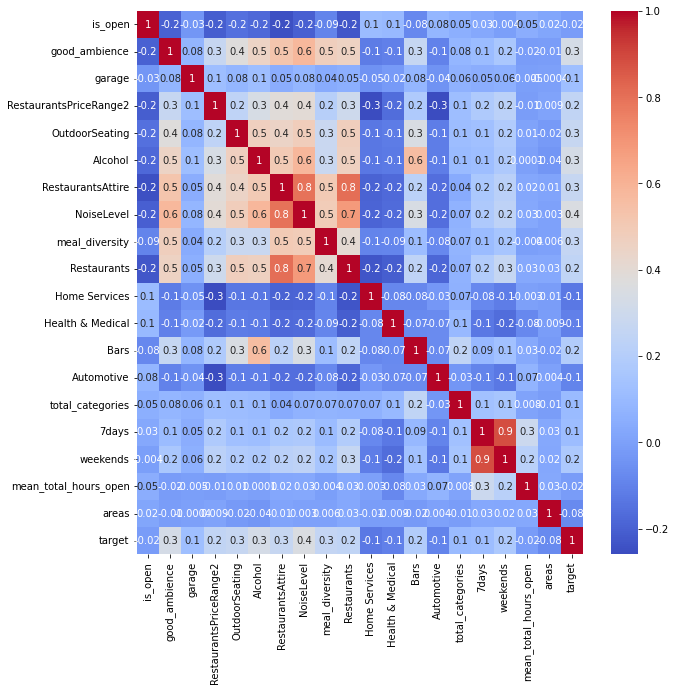

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(subset1.drop('RestaurantsAttire', axis =1).corr(method='spearman'), annot=True, fmt='.1g', cmap='coolwarm')

<AxesSubplot:>

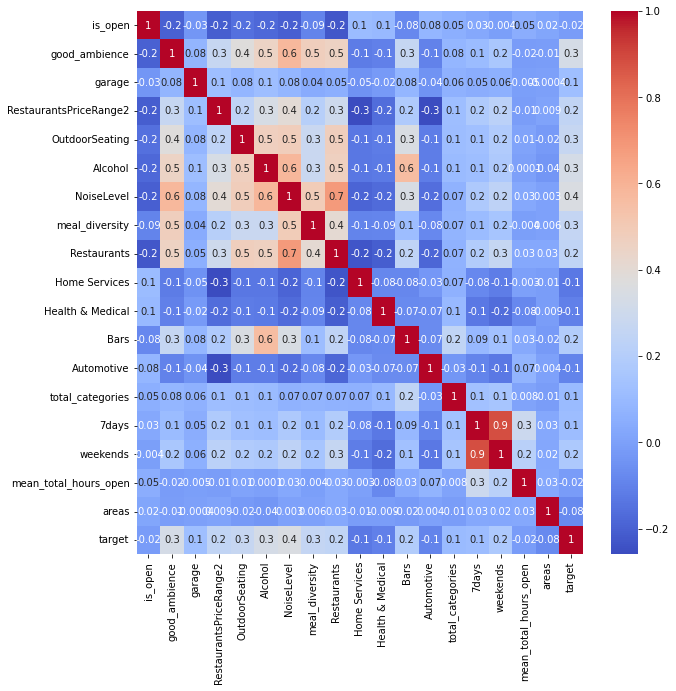

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(subset1.drop('RestaurantsAttire', axis =1).corr(method='spearman'), annot=True, fmt='.1g', cmap='coolwarm')

<AxesSubplot:>

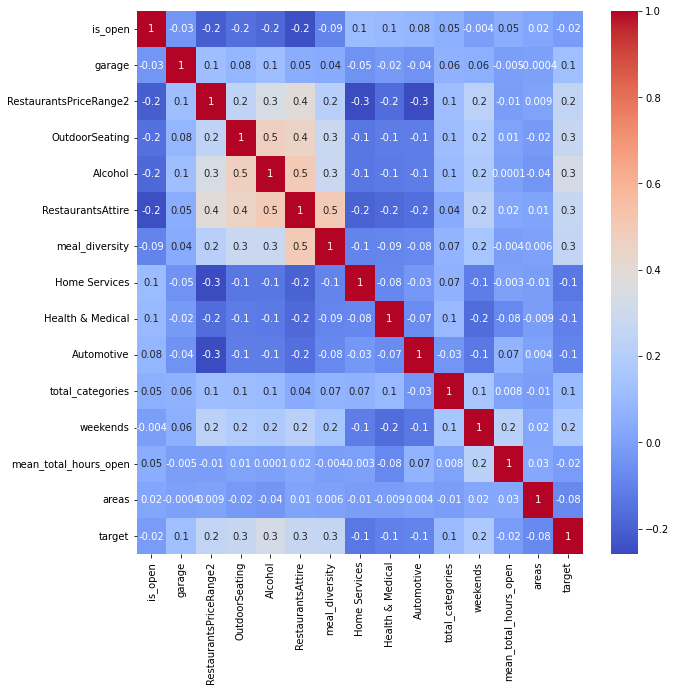

In [61]:
plt.figure(figsize=(10,10))
sns.heatmap(subset1.drop(['NoiseLevel','good_ambience', '7days', 'Bars', 'Restaurants'], axis =1).corr(method='spearman'), annot=True, fmt='.1g', cmap='coolwarm')

In [62]:
!pip install squarify

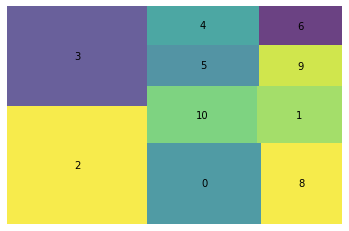

In [63]:
import squarify
import matplotlib.pyplot as plt


top = subset1.groupby('areas').agg({'target':'sum'}).sort_values(by='target', ascending=False).head(10)

squarify.plot(sizes=top['target'], label=top.index, alpha=.8 )
plt.axis('off')
plt.show()

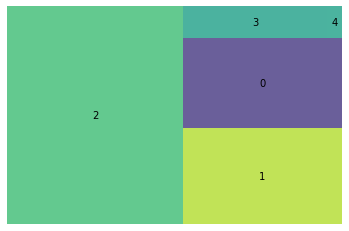

In [67]:
import squarify
import matplotlib.pyplot as plt


top = subset1.groupby('RestaurantsPriceRange2').agg({'target':'sum'}).sort_values(by='target', ascending=False).head(10)

squarify.plot(sizes=top['target'], label=top.index, alpha=.8 )
plt.axis('off')
plt.show()

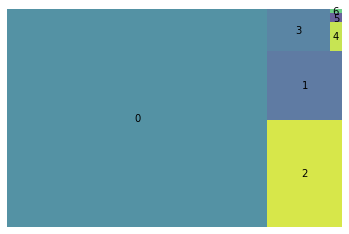

In [68]:
import squarify
import matplotlib.pyplot as plt


top = subset1.groupby('meal_diversity').agg({'target':'sum'}).sort_values(by='target', ascending=False).head(10)

squarify.plot(sizes=top['target'], label=top.index, alpha=.8 )
plt.axis('off')
plt.show()

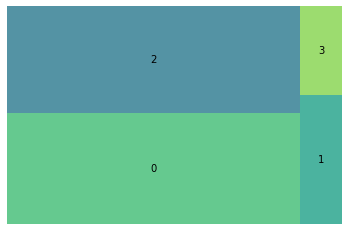

In [69]:
import squarify
import matplotlib.pyplot as plt


top = subset1.groupby('NoiseLevel').agg({'target':'sum'}).sort_values(by='target', ascending=False).head(10)

squarify.plot(sizes=top['target'], label=top.index, alpha=.8 )
plt.axis('off')
plt.show()

In [71]:
subset1.describe()

,is_open,good_ambience,garage,RestaurantsPriceRange2,OutdoorSeating,Alcohol,RestaurantsAttire,NoiseLevel,meal_diversity,Restaurants,Home Services,Health & Medical,Bars,Automotive,total_categories,7days,weekends,mean_total_hours_open,areas,target
count,150346.00000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000
mean,0.79615,0.117722,0.027536,1.002827,0.149981,0.147932,0.260845,0.481596,0.150253,0.347890,0.095552,0.079138,0.073647,0.071704,4.449785,0.474146,0.534115,10.764886,4.420304,0.203870
std,0.40286,0.322279,0.163641,1.002315,0.357054,0.355034,0.439097,0.873462,0.555142,0.476139,0.293876,0.269863,0.261108,0.257909,2.230387,0.499333,0.498836,3.822003,3.160624,0.402875
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.016667,0.000000,0.000000
25%,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,8.800000,2.000000,0.000000
50%,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000,10.516299,3.000000,0.000000
75%,1.00000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,1.000000,11.500000,8.000000,0.000000
max,1.00000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,3.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,1.000000,1.000000,24.000000,10.000000,1.000000


In [78]:
cat1 = [
 'is_open',
 'good_ambience',
 'garage',
 'RestaurantsPriceRange2',
 'OutdoorSeating',
 'Alcohol',
 'RestaurantsAttire',
 'NoiseLevel',
 'meal_diversity',
 'Restaurants',
 'Home Services',
 'Health & Medical',
 'Bars',
 'Automotive',
 '7days',
 'weekends',
 'areas',
 'target']

In [ ]:
#!pip install tableone

In [79]:
from tableone import TableOne, load_dataset
#https://tableone.readthedocs.io/en/latest/quickstart.html

mytable = TableOne(subset1.drop('business_id', axis =1), dip_test=True, normal_test=True, tukey_test=True, categorical = cat1)

mytable.tableone

Missing        Overall
n                                      150346
is_open, n (%)       0       0   30648 (20.4)
                     1          119698 (79.6)
good_ambience, n (%) 0       0  132647 (88.2)
                     1           17699 (11.8)
...                        ...            ...
areas, n (%)         7             4471 (3.0)
                     8            11266 (7.5)
                     9            14043 (9.3)
target, n (%)        0       0  119695 (79.6)
                     1           30651 (20.4)

[63 rows x 2 columns]

In [125]:
cat1 = [
 'is_open',
 'good_ambience',
 'garage',
 'RestaurantsPriceRange2',
 'OutdoorSeating',
 'Alcohol',
 'RestaurantsAttire',
 'NoiseLevel',
 'meal_diversity',
 'Restaurants',
 'Home Services',
 'Health & Medical',
 'Bars',
 'Automotive',
 '7days',
 'weekends',
 'areas',
 'target']

In [126]:
mytable2 = TableOne(subset1.drop(['business_id'], axis =1), groupby='target', pval=True, categorical = cat1, rename={'target': 'Sucessfull or not'})

mytable2.tableone.to_html('mytable2.html')

IS OPEN NOT RELEVANT for target
TO MUCH CORRELATION BETWEEN ALCOHOL and bars, and restaurants with restaurants features.

Also correlation with weekends and 7days. 

In [128]:
subset1.drop(['is_open'], axis =1).to_csv('subset1.csv')

In [130]:
subset1.drop(['is_open'], axis =1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150346 entries, 0 to 150345
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   business_id             150346 non-null  object 
 1   good_ambience           150346 non-null  int64  
 2   garage                  150346 non-null  int64  
 3   RestaurantsPriceRange2  150346 non-null  int64  
 4   OutdoorSeating          150346 non-null  int64  
 5   Alcohol                 150346 non-null  int64  
 6   RestaurantsAttire       150346 non-null  int64  
 7   NoiseLevel              150346 non-null  int64  
 8   meal_diversity          150346 non-null  int64  
 9   Restaurants             150346 non-null  int64  
 10  Home Services           150346 non-null  int64  
 11  Health & Medical        150346 non-null  int64  
 12  Bars                    150346 non-null  int64  
 13  Automotive              150346 non-null  int64  
 14  total_categories    

<AxesSubplot:>

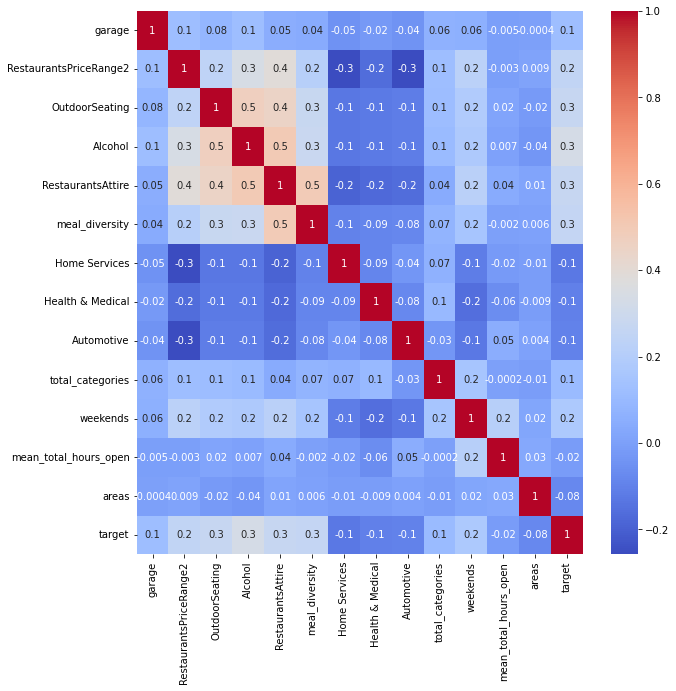

In [132]:
plt.figure(figsize=(10,10))
sns.heatmap(subset1.drop(['is_open', 'NoiseLevel','good_ambience', '7days', 'Bars', 'Restaurants'], axis =1).corr(method='spearman'), annot=True, fmt='.1g', cmap='coolwarm')

In [133]:
subset1_final = subset1.drop(['is_open', 'NoiseLevel','good_ambience', '7days', 'Bars', 'Restaurants'], axis = 1)

In [134]:
subset1_final.to_csv('./data/subsets/subset1_final.csv')

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

from sklearn.utils import class_weight

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

#from functions import run_exps

import warnings
warnings.filterwarnings('ignore') 

In [183]:
def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
        '''
        Lightweight script to test many models and find winners
        :param X_train: training split
        :param y_train: training target vector
        :param X_test: test split
        :param y_test: test target vector
        :return: DataFrame of predictions
        '''
        
        dfs = []

        #dt = DecisionTreeClassifier(max_depth=1)

        models = [
                ('LogReg', LogisticRegression()), 
                ('RF', RandomForestClassifier()),
                ('KNN', KNeighborsClassifier()),
                ('GNB', GaussianNB()),
                ('XGB', XGBClassifier()),
                ('ADA', AdaBoostClassifier())
                ]
        results = []
        names = []

        scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']

        target_names = ['business_fail','business_success']

        for name, model in models:
                kfold = KFold(n_splits=5, shuffle=True, random_state=90210)
                cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
                clf = model.fit(X_train, y_train)
                y_pred = clf.predict(X_test)
                print(name)
                print(classification_report(y_test, y_pred))#, target_names=target_names))
                results.append(cv_results)
                names.append(name)
                this_df = pd.DataFrame(cv_results)
                this_df['model'] = name
                dfs.append(this_df)
        final = pd.concat(dfs, ignore_index=True)
        return final

In [3]:
import pandas as pd
import numpy as np

In [4]:
subset1_final = pd.read_csv('./data/subsets/subset1_final.csv')

In [5]:
subset1_final.index = subset1_final['business_id']
subset1_final.drop(['business_id', 'Unnamed: 0'], axis = 1, inplace = True)

In [6]:
subset1_final.head()

,garage,RestaurantsPriceRange2,OutdoorSeating,Alcohol,RestaurantsAttire,meal_diversity,Home Services,Health & Medical,Automotive,total_categories,weekends,mean_total_hours_open,areas,target
business_id,,,,,,,,,,,,,,
Pns2l4eNsfO8kk83dixA6A,0,0,0,0,0,0,0,1,0,6,0,10.772699,0,0
mpf3x-BjTdTEA3yCZrAYPw,0,0,0,0,0,0,0,0,0,5,0,12.000000,2,0
tUFrWirKiKi_TAnsVWINQQ,0,2,0,0,0,0,0,0,0,6,1,14.285714,4,0
MTSW4McQd7CbVtyjqoe9mw,0,1,0,0,0,0,0,0,0,5,1,13.428571,3,1
mWMc6_wTdE0EUBKIGXDVfA,0,0,0,0,0,0,0,0,0,3,1,8.000000,9,0


In [202]:
ohe = OneHotEncoder(sparse=False)
to_transform = ['areas']
X = ohe.fit_transform(subset1_final[to_transform])
X = pd.DataFrame(X, columns=ohe.get_feature_names_out(to_transform))
subset1_final = pd.concat([subset1_final, X], axis=1)
subset1_final.drop(to_transform, axis=1, inplace=True)

In [203]:
subset1_final.fillna(0, inplace = True)

In [204]:
X_train, X_test, y_train, y_test = train_test_split(
    subset1_final.drop('target', axis=1), subset1_final['target'], test_size=0.2,
    random_state=42, stratify=subset1_final['target'])

In [205]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

[23:41:27] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree_vals" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:41:29] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree_vals" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:42:00] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree_vals" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some p

# EXPERIMENTS

In [9]:
!pip install wandb plotly
import wandb
wandb.login()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 57.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.0/169.0 kB 47.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 45.4 MB/s eta 0:00:00
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21486 sha256=3d2e7ffc478ac9f7a85d0194d54d990d930bc187750fdb9a72bc80e0f36354d1
  Stored in directory: /root/.cache/pip/wheels/e1/e8/83/ddea66100678d139b14bc87692ece57c6a2a937956d2532608
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=a8dc785fbb2091d2b06a93cef18388791c05979ed9afce7212e9ca9131b517e9
  Stored in directory: /root/.cache/pip/wheels/b7/0a/67/ada2a22079218c75a88361c0782855cc72aebc4d18d0289d05
Successfully built promise pathtools
  Attempting uninstall: urllib

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [32]:
wandb.init(project="henry-tf-g2-ml1")

In [207]:
final = run_exps(X_train, y_train, X_test, y_test)

LogReg
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     54009
         1.0       0.64      0.28      0.39      6130

    accuracy                           0.91     60139
   macro avg       0.78      0.63      0.67     60139
weighted avg       0.89      0.91      0.89     60139

RF
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95     54009
         1.0       0.53      0.35      0.42      6130

    accuracy                           0.90     60139
   macro avg       0.73      0.66      0.68     60139
weighted avg       0.89      0.90      0.89     60139

KNN
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95     54009
         1.0       0.54      0.35      0.42      6130

    accuracy                           0.90     60139
   macro avg       0.74      0.66      0.69     60139
weighted avg       0.89      0.90      0.89     60139

GNB
 

In [208]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics


## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')


## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

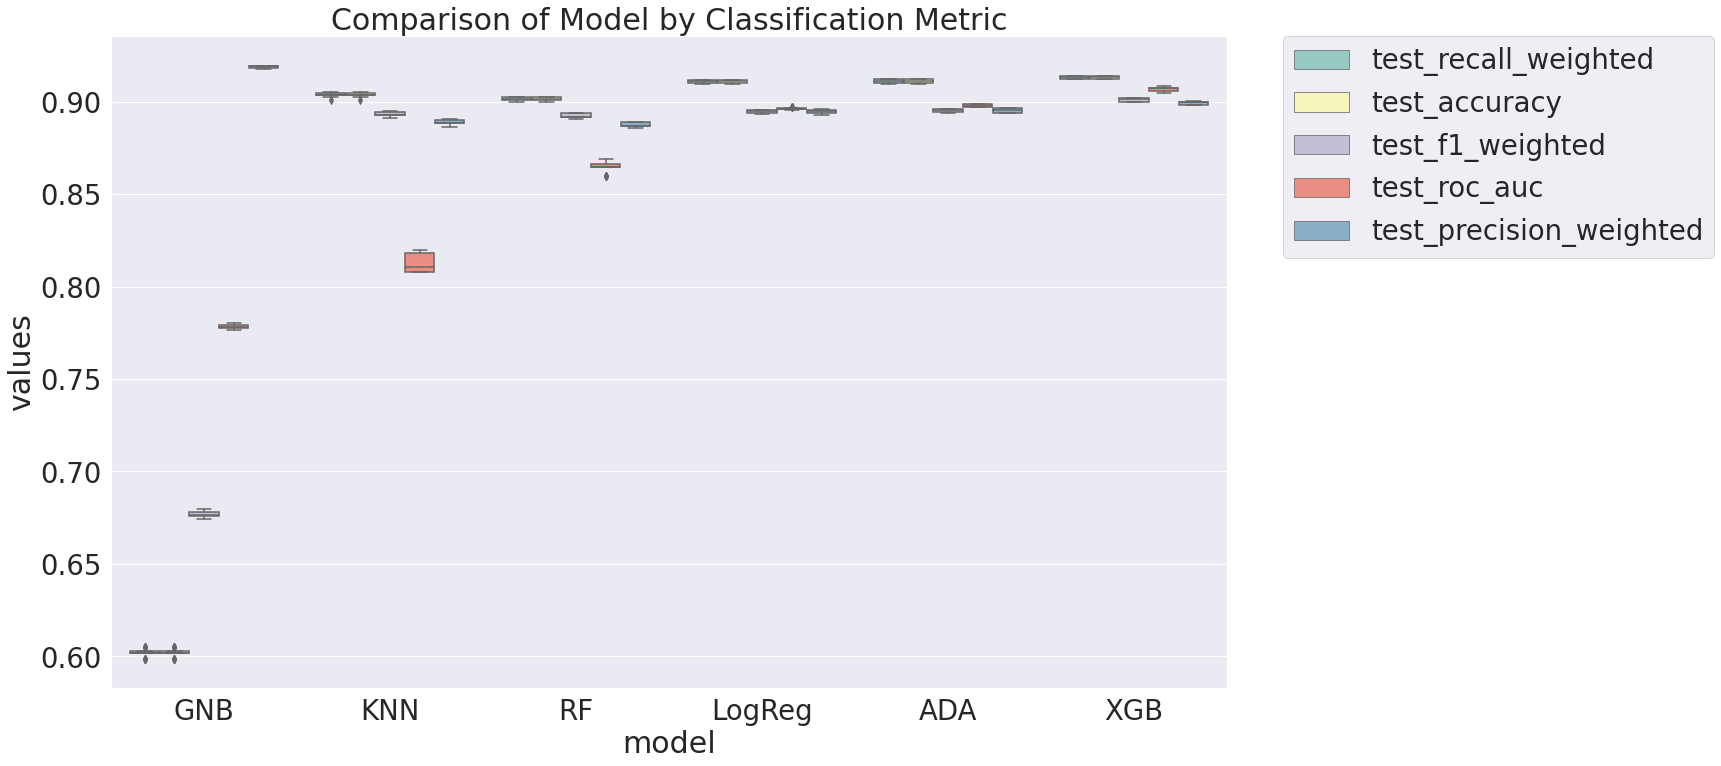

In [209]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

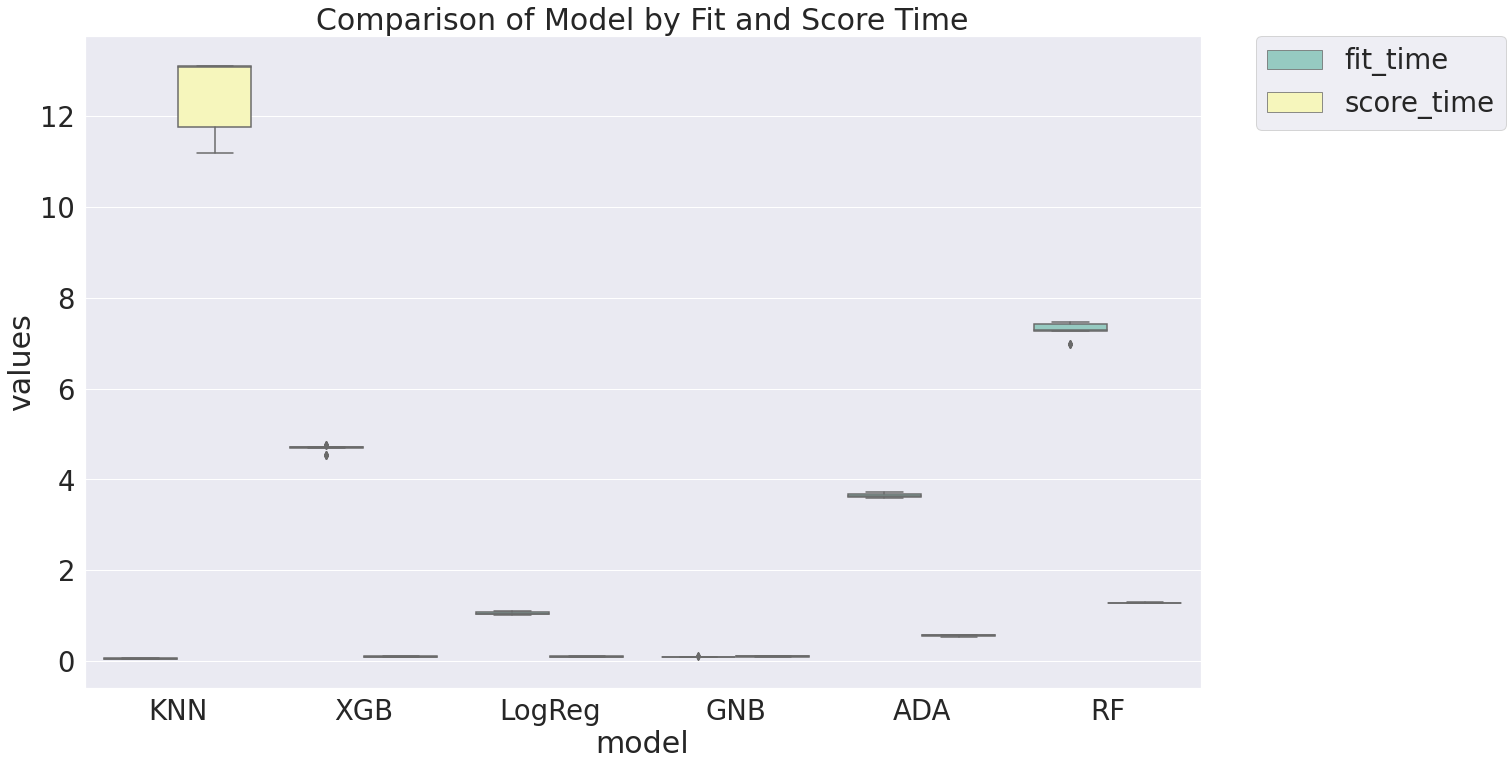

In [210]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
plt.savefig('./benchmark_models_time.png',dpi=300)

In [211]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])

test_accuracy           test_precision_weighted            \
                 std      mean                     std      mean   
model                                                              
ADA         0.000866  0.911201                0.001071  0.895317   
GNB         0.002145  0.601938                0.000582  0.918730   
KNN         0.001049  0.903736                0.001206  0.888788   
LogReg      0.000829  0.910869                0.001236  0.894756   
RF          0.001178  0.901407                0.001354  0.887490   
XGB         0.000825  0.913097                0.000934  0.899278   

       test_f1_weighted           test_roc_auc           test_recall_weighted  \
                    std      mean          std      mean                  std   
model                                                                           
ADA            0.000853  0.895085     0.000665  0.898035             0.000866   
GNB            0.001894  0.676793     0.001188  0.778332             0.002145   
KNN            0.001089  0.893381     0.005147  0.813205             0.001049   
LogReg         0.000958  0.894624     0.000556  0.896124             0.000829   
RF             0.001238  0.892317     0.002775  0.864924             0.001178   
XGB            0.000837  0.900933     0.001306  0.906802             0.000825   

                  
            mean  
model             
ADA     0.911201  
GNB     0.601938  
KNN     0.903736  
LogReg  0.910869  
RF      0.901407  
XGB     0.913097

In [212]:
!pip install plotly

In [213]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import xgboost as xgb
import warnings
warnings.filterwarnings('ignore') 

gbm_param_grid = {'learning_rate': [0.01,0.1,0.5,0.9],
                'n_estimators': [10,20,50,100,200],
                'subsample': [0.3, 0.5, 0.9],
                'colsample_bytree_vals' : [0.1, 0.5, 0.8, 1],
                'max_depth': [2, 5, 10]
                }


gbm = xgb.XGBClassifier(objective='binary:logistic')

#grid_class = GridSearchCV(estimator=gbm,param_grid=gbm_param_grid, scoring='accuracy', cv=3, verbose=1)
grid_class = RandomizedSearchCV(estimator=gbm,param_distributions=gbm_param_grid, scoring='accuracy', cv=3, verbose=1, n_iter=50, n_jobs=-1)

grid_class.fit(X_train, y_train)

print("Best parameters found: ",grid_class.best_params_)

print("Best accuracy found: ", grid_class.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[23:52:02] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree_vals" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:52:06] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree_vals" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:52:18] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree_vals" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but


In [215]:
# Split the data into training and test sets

xg_cl = xgb.XGBClassifier(objective='binary:logistic', 
                        n_estimators=200, 
                        seed=123,
                        learning_rate=0.9,
                        subsample=0.9,
                        colsample_bytree_vals=0.5,
                        max_depth=2)
                        
xg_cl.fit(X_train, y_train)

preds_xgb = xg_cl.predict(X_test)

[23:58:58] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree_vals" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




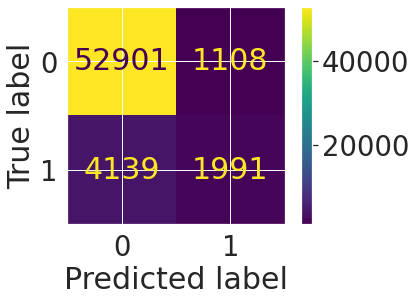

[[52901  1108]
 [ 4139  1991]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     54009
         1.0       0.64      0.32      0.43      6130

    accuracy                           0.91     60139
   macro avg       0.78      0.65      0.69     60139
weighted avg       0.90      0.91      0.90     60139



In [216]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

matrix = confusion_matrix(y_test, preds_xgb)
cm_display = ConfusionMatrixDisplay(matrix)
cm_display.plot()
plt.show()

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, preds_xgb))
print(classification_report(y_test, preds_xgb))

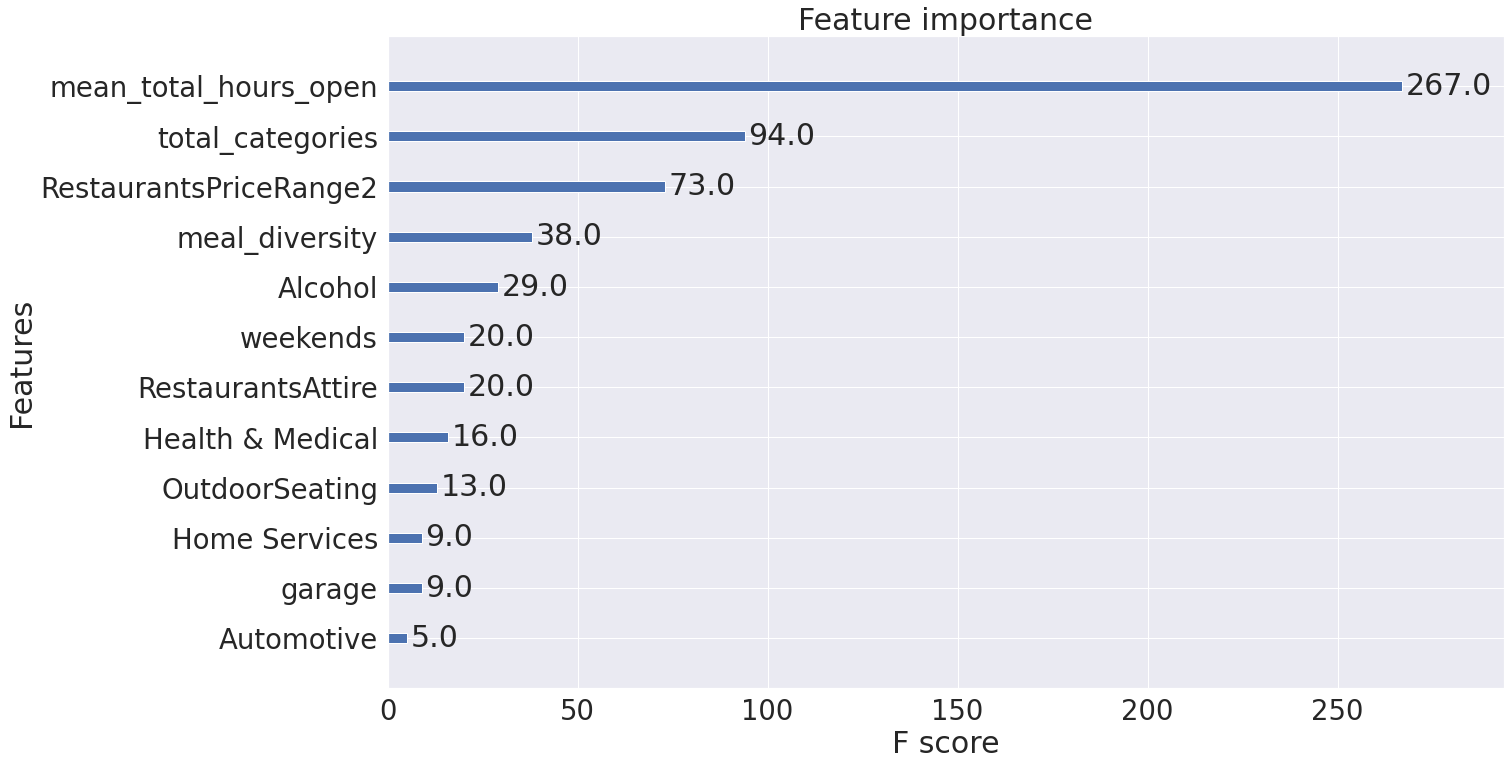

In [217]:
# Plot the feature importances
fig, ax = plt.subplots(figsize=(20, 12))
xgb.plot_importance(xg_cl, ax=ax)
plt.show()

In [218]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, preds_xgb)

In [219]:
# OR to log a final metric at the end of training you can also use wandb.summary
wandb.summary["accuracy"] = accuracy

In [222]:
# OR to log a final metric at the end of training you can also use wandb.summary
wandb.summary["accuracy"] = accuracy
# Visualize single plot
wandb.sklearn.plot_confusion_matrix(y_test, preds_xgb)

In [223]:
X_train.columns

Index(['garage', 'RestaurantsPriceRange2', 'OutdoorSeating', 'Alcohol',
       'RestaurantsAttire', 'meal_diversity', 'Home Services',
       'Health & Medical', 'Automotive', 'total_categories', 'weekends',
       'mean_total_hours_open', 'areas_0', 'areas_1', 'areas_2', 'areas_3',
       'areas_4', 'areas_5', 'areas_6', 'areas_7', 'areas_8', 'areas_9',
       'areas_10'],
      dtype='object')

In [ ]:
from joblib import dump, load
dump(xg_cl, './models/xgb_v3.joblib') 

## EXP 2 = sin Canada

In [20]:
subset1_final = pd.read_csv('./data/subsets/subset1_final.csv')

In [21]:
subset1_final.index = subset1_final['business_id']
subset1_final.drop(['business_id', 'Unnamed: 0'], axis = 1, inplace = True)

In [22]:
subset1_final.loc[subset1_final['areas'] != 7, :]

,garage,RestaurantsPriceRange2,OutdoorSeating,Alcohol,RestaurantsAttire,meal_diversity,Home Services,Health & Medical,Automotive,total_categories,weekends,mean_total_hours_open,areas,target
business_id,,,,,,,,,,,,,,
Pns2l4eNsfO8kk83dixA6A,0,0,0,0,0,0,0,1,0,6,0,10.772699,0,0
mpf3x-BjTdTEA3yCZrAYPw,0,0,0,0,0,0,0,0,0,5,0,12.000000,2,0
tUFrWirKiKi_TAnsVWINQQ,0,2,0,0,0,0,0,0,0,6,1,14.285714,4,0
MTSW4McQd7CbVtyjqoe9mw,0,1,0,0,0,0,0,0,0,5,1,13.428571,3,1
mWMc6_wTdE0EUBKIGXDVfA,0,0,0,0,0,0,0,0,0,3,1,8.000000,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IUQopTMmYQG-qRtBk-8QnA,0,3,0,0,0,0,0,0,0,2,1,8.714286,6,0
c8GjPIOTGVmIemT7j5_SyQ,0,2,0,0,0,0,0,0,0,7,1,9.142857,5,0
_QAMST-NrQobXduilWEqSw,0,1,0,0,0,0,0,0,0,7,0,10.772699,8,0


In [26]:
subset1_final_sin_canada = subset1_final.loc[subset1_final['areas'] != 7, :]

In [27]:
ohe = OneHotEncoder(sparse=False)
to_transform = ['areas']
X = ohe.fit_transform(subset1_final_sin_canada[to_transform])
X = pd.DataFrame(X, columns=ohe.get_feature_names_out(to_transform))
subset1_final_sin_canada = pd.concat([subset1_final_sin_canada, X], axis=1)
subset1_final_sin_canada.drop(to_transform, axis=1, inplace=True)

In [28]:
subset1_final_sin_canada.fillna(0, inplace = True)

In [29]:
subset1_final_sin_canada.columns

Index(['garage', 'RestaurantsPriceRange2', 'OutdoorSeating', 'Alcohol',
       'RestaurantsAttire', 'meal_diversity', 'Home Services',
       'Health & Medical', 'Automotive', 'total_categories', 'weekends',
       'mean_total_hours_open', 'target', 'areas_0', 'areas_1', 'areas_2',
       'areas_3', 'areas_4', 'areas_5', 'areas_6', 'areas_8', 'areas_9',
       'areas_10'],
      dtype='object')

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    subset1_final_sin_canada.drop('target', axis=1), subset1_final_sin_canada['target'], test_size=0.2,
    random_state=42, stratify=subset1_final_sin_canada['target'])

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import xgboost as xgb
import warnings
warnings.filterwarnings('ignore') 

gbm_param_grid = {'learning_rate': [0.01,0.1,0.5,0.9],
                'n_estimators': [10,20,50,100,200],
                'subsample': [0.3, 0.5, 0.9],
                'colsample_bytree_vals' : [0.1, 0.5, 0.8, 1],
                'max_depth': [2, 5, 10]
                }


gbm = xgb.XGBClassifier(objective='binary:logistic')

#grid_class = GridSearchCV(estimator=gbm,param_grid=gbm_param_grid, scoring='accuracy', cv=3, verbose=1)
grid_class = RandomizedSearchCV(estimator=gbm,param_distributions=gbm_param_grid, scoring='accuracy', cv=3, verbose=1, n_iter=50, n_jobs=-1)

grid_class.fit(X_train, y_train)

print("Best parameters found: ",grid_class.best_params_)

print("Best accuracy found: ", grid_class.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[01:13:46] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree_vals" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:13:52] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree_vals" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:14:07] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree_vals" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but


In [33]:
# Split the data into training and test sets

xg_cl = xgb.XGBClassifier(objective='binary:logistic', 
                        n_estimators=200, 
                        seed=123,
                        learning_rate=0.1,
                        subsample=0.3,
                        colsample_bytree_vals=0.8,
                        max_depth=5)
                        
xg_cl.fit(X_train, y_train)

preds_xgb = xg_cl.predict(X_test)

[01:23:21] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree_vals" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[01:17:32] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree_vals" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:18:36] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree_vals" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:17:43] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree_vals" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some p

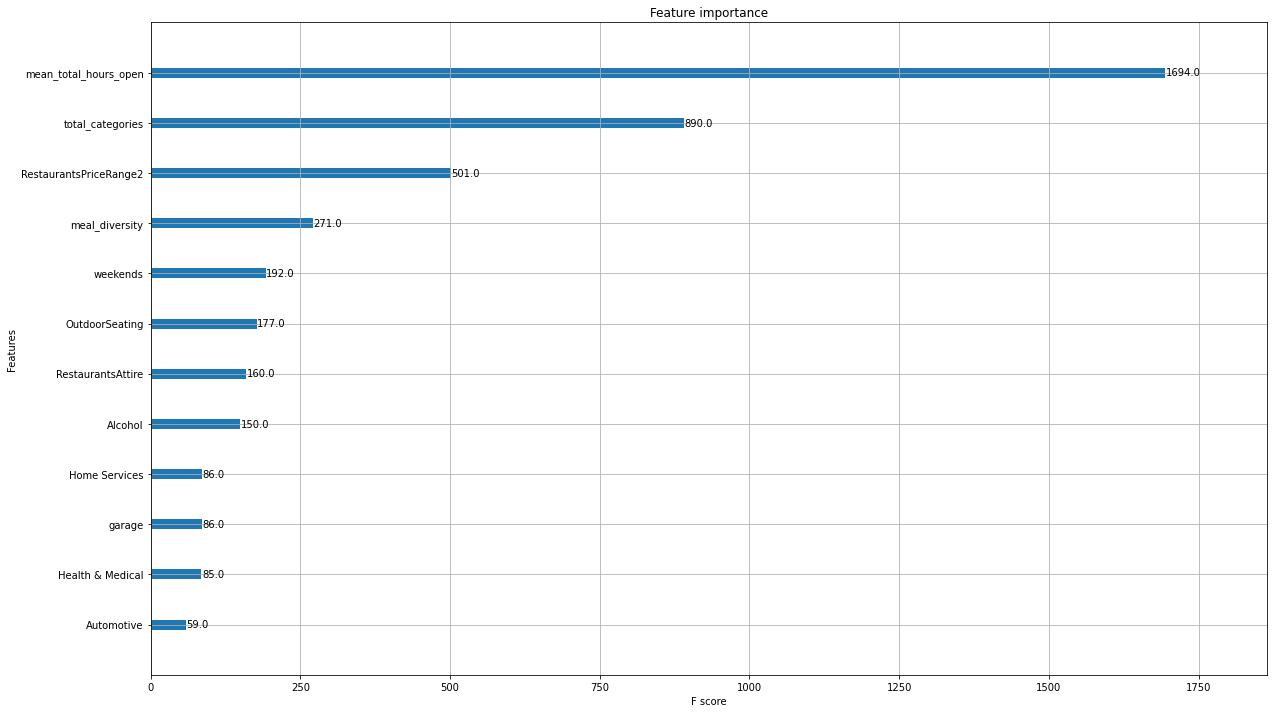

ValueError: min() arg is an empty sequence

In [37]:
# Plot the feature importances
fig, ax = plt.subplots(figsize=(20, 12))
xgb.plot_importance(xg_cl, ax=ax)
plt.show()
wandb.log({"plot": plt})

In [35]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, preds_xgb)

In [36]:
# OR to log a final metric at the end of training you can also use wandb.summary
wandb.summary["accuracy"] = accuracy
# Visualize single plot
wandb.sklearn.plot_confusion_matrix(y_test, preds_xgb)

In [ ]:
!add-apt-repository universe
!apt update
!apt install graphviz -y
!pip install graphviz

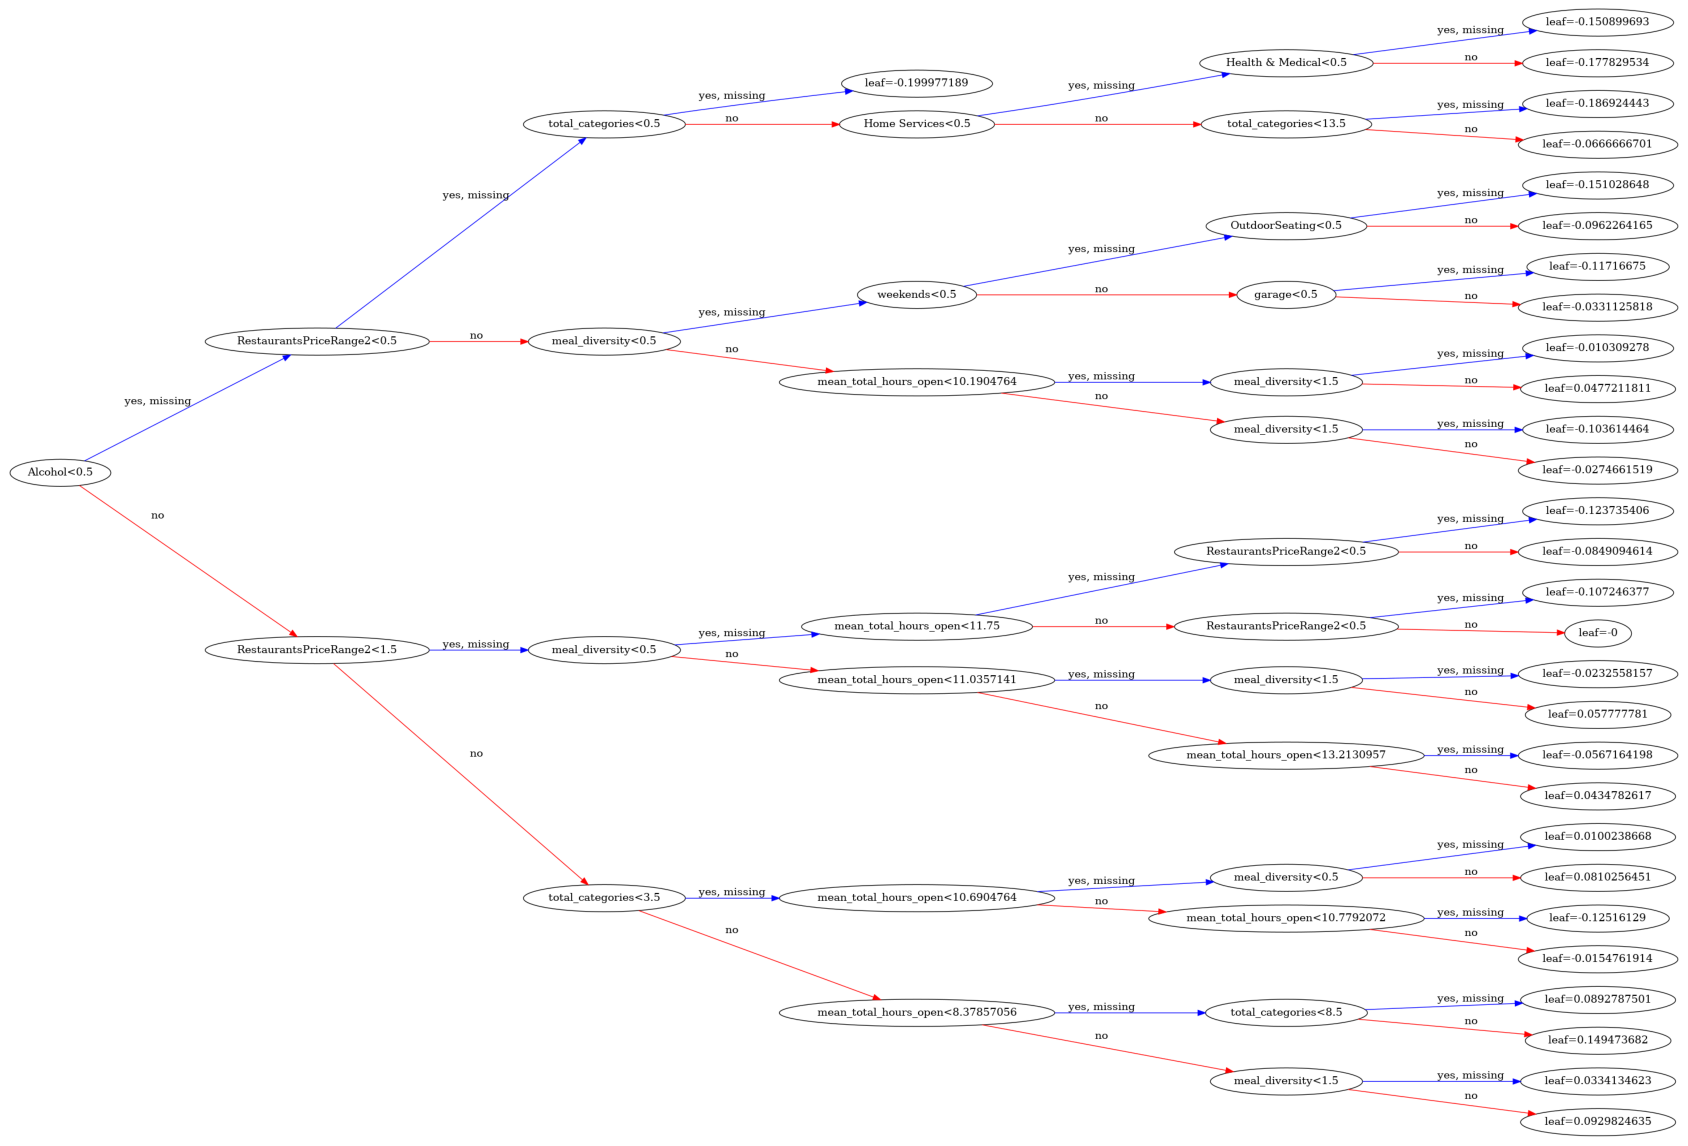

ValueError: min() arg is an empty sequence

In [41]:
fig, ax = plt.subplots(figsize=(30, 30))
# Plot the last tree sideways
xgb.plot_tree(xg_cl,num_trees = 0, rankdir = 'LR', ax=ax)
plt.show()
wandb.log({"plot": plt})

In [43]:
from joblib import dump, load
dump(xg_cl, './models/xgb_exp2.joblib') 

['./models/xgb_exp2.joblib']

## EXP 3 less data without Canada and Sentiment Analysis

In [ ]:
import pandas as pd

sentiment = pd.read_csv('./data/sentiment/full_sentiment.csv')

In [1]:
import pandas as pd
import glob
import os

path = r'./data/sentiment/f' # use your path

all_files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

In [2]:
df.shape

(6990280, 4)

In [3]:
df.columns

Index(['Unnamed: 0', 'review_id', 'labels', 'scores'], dtype='object')

In [4]:
df.head()

,Unnamed: 0,review_id,labels,scores
0,0,KU_O5udG6zpxOg-VcAEodg,LABEL_0,0.982139
1,1,BiTunyQ73aT9WBnpR9DZGw,LABEL_1,0.999938
2,2,saUsX_uimxRlCVr67Z4Jig,LABEL_1,0.999861
3,3,AqPFMleE6RsU23_auESxiA,LABEL_1,0.999918
4,4,Sx8TMOWLNuJBWer-0pcmoA,LABEL_1,0.976466


In [ ]:
df.groupby('business_id').agg({'labels': 'count'}).sort_values(by = 'text', ascending = False)

In [142]:
subset2list = ['business_id',
 'good_ambience',
 'meal_diversity',
 'total_categories',
 'weekends',
 'mean_total_hours_open',
 'areas',
 'target']


full_data = pd.read_csv('./data/full_data.csv')
subset2 = full_data[subset2list]
subset2.head()

,business_id,good_ambience,meal_diversity,total_categories,weekends,mean_total_hours_open,areas,target
0,Pns2l4eNsfO8kk83dixA6A,0,0,6.0,0,NaN,0,0
1,mpf3x-BjTdTEA3yCZrAYPw,0,0,5.0,0,12.000000,2,0
2,tUFrWirKiKi_TAnsVWINQQ,0,0,6.0,1,14.285714,4,0
3,MTSW4McQd7CbVtyjqoe9mw,0,0,5.0,1,13.428571,3,1
4,mWMc6_wTdE0EUBKIGXDVfA,0,0,3.0,1,8.000000,9,0


In [143]:
subset2_final = subset2.loc[subset2['areas'] != 7, :]

In [144]:
subset2_final.index = subset2_final['business_id']
subset2_final.drop(['business_id'], axis = 1, inplace = True)

In [145]:
subset2_final['total_categories'].fillna(0, inplace=True)

In [146]:
subset2_final.isna().sum()

good_ambience                0
meal_diversity               0
total_categories             0
weekends                     0
mean_total_hours_open    22647
areas                        0
target                       0
dtype: int64

In [147]:
subset2_final

,good_ambience,meal_diversity,total_categories,weekends,mean_total_hours_open,areas,target
business_id,,,,,,,
Pns2l4eNsfO8kk83dixA6A,0,0,6.0,0,NaN,0,0
mpf3x-BjTdTEA3yCZrAYPw,0,0,5.0,0,12.000000,2,0
tUFrWirKiKi_TAnsVWINQQ,0,0,6.0,1,14.285714,4,0
MTSW4McQd7CbVtyjqoe9mw,0,0,5.0,1,13.428571,3,1
mWMc6_wTdE0EUBKIGXDVfA,0,0,3.0,1,8.000000,9,0
...,...,...,...,...,...,...,...
IUQopTMmYQG-qRtBk-8QnA,0,0,2.0,1,8.714286,6,0
c8GjPIOTGVmIemT7j5_SyQ,0,0,7.0,1,9.142857,5,0
_QAMST-NrQobXduilWEqSw,0,0,7.0,0,NaN,8,0


In [148]:
# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

subset2_final['mean_total_hours_open'] = mice_imputer.fit_transform(subset2_final['mean_total_hours_open'].values.reshape(-1,1))

In [149]:
subset2_final.isna().sum()

good_ambience            0
meal_diversity           0
total_categories         0
weekends                 0
mean_total_hours_open    0
areas                    0
target                   0
dtype: int64

In [152]:
subset2_final.describe()

,good_ambience,meal_diversity,total_categories,weekends,mean_total_hours_open,areas,target
count,145875.000000,145875.000000,145875.000000,145875.000000,145875.000000,145875.000000,145875.000000
mean,0.118149,0.150883,4.444901,0.536260,10.768845,4.341237,0.204723
std,0.322786,0.556556,2.231025,0.498685,3.821675,3.175767,0.403501
min,0.000000,0.000000,0.000000,0.000000,0.016667,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,8.800000,2.000000,0.000000
50%,0.000000,0.000000,4.000000,1.000000,10.666667,3.000000,0.000000
75%,0.000000,0.000000,6.000000,1.000000,11.428571,8.000000,0.000000
max,1.000000,6.000000,36.000000,1.000000,24.000000,10.000000,1.000000


In [156]:
subset2_final.shape

(145875, 7)

In [160]:
subset2_final['business_id'] = subset2_final.index
subset2_final.reset_index(drop=True, inplace=True)

In [161]:
subset2_final['business_id'] = subset2_final.index
subset2_final.reset_index(drop=True, inplace=True)

ohe = OneHotEncoder(sparse=False)
to_transform = ['meal_diversity', 'areas']
X = ohe.fit_transform(subset2_final[to_transform])
X = pd.DataFrame(X, columns=ohe.get_feature_names_out(to_transform))
subset2_final = pd.concat([subset2_final, X], axis=1)
subset2_final.drop(to_transform, axis=1, inplace=True)

subset2_final.index = subset2_final['business_id'] 
subset2_final.drop(['business_id'], axis = 1, inplace = True)
subset2_final

,good_ambience,total_categories,weekends,mean_total_hours_open,target,meal_diversity_0,meal_diversity_1,meal_diversity_2,meal_diversity_3,meal_diversity_4,...,areas_0,areas_1,areas_2,areas_3,areas_4,areas_5,areas_6,areas_7,areas_8,areas_9
business_id,,,,,,,,,,,,,,,,,,,,,
0,0,6.0,0,10.768845,0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,5.0,0,12.000000,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,6.0,1,14.285714,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,5.0,1,13.428571,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,3.0,1,8.000000,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145870,0,2.0,1,8.714286,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
145871,0,7.0,1,9.142857,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
145872,0,7.0,0,10.768845,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [162]:
subset2_final.isna().sum()

good_ambience            0
total_categories         0
weekends                 0
mean_total_hours_open    0
target                   0
meal_diversity_0         0
meal_diversity_1         0
meal_diversity_2         0
meal_diversity_3         0
meal_diversity_4         0
meal_diversity_5         0
meal_diversity_6         0
areas_0                  0
areas_1                  0
areas_2                  0
areas_3                  0
areas_4                  0
areas_5                  0
areas_6                  0
areas_7                  0
areas_8                  0
areas_9                  0
dtype: int64

In [163]:
X_train, X_test, y_train, y_test = train_test_split(
    subset2_final.drop('target', axis=1), subset2_final['target'], test_size=0.2,
    random_state=42, stratify=subset2_final['target'])

In [164]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import xgboost as xgb
import warnings
warnings.filterwarnings('ignore') 

gbm_param_grid = {'learning_rate': [0.01,0.1,0.5,0.9],
                'n_estimators': [10,20,50,100,200],
                'subsample': [0.3, 0.5, 0.9],
                'colsample_bytree_vals' : [0.1, 0.5, 0.8, 1],
                'max_depth': [2, 5, 10]
                }


gbm = xgb.XGBClassifier(objective='binary:logistic')

#grid_class = GridSearchCV(estimator=gbm,param_grid=gbm_param_grid, scoring='accuracy', cv=3, verbose=1)
grid_class = RandomizedSearchCV(estimator=gbm,param_distributions=gbm_param_grid, scoring='accuracy', cv=3, verbose=1, n_iter=50, n_jobs=-1)

grid_class.fit(X_train, y_train)

print("Best parameters found: ",grid_class.best_params_)

print("Best accuracy found: ", grid_class.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[02:15:41] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree_vals" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:15:41] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree_vals" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:15:44] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree_vals" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but


In [165]:
!pip install tpot
import tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 41.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=0fd7be7c9f41e5c3b66c6721934fb367b3f7e6d23964a507052ac59c7c4113c6
  Stored in directory: /root/.cache/pip/wheels/48/8c/93/3afb1916772591fe6bcc25cdf8b1c5bdc362f0ec8e2f0fd413
Successfully built stopit


In [ ]:
pipeline_optimizer = tpot.TPOTClassifier(generations=5, #number of iterations to run the training
                                         population_size=20, #number of individuals to train
                                         cv=5, max_time_mins = 60) #number of folds in StratifiedKFold
pipeline_optimizer.fit(X_train, y_train) #fit the pipeline optimizer - can take a long time

print(pipeline_optimizer.score(X_test, y_test)) #print scoring for the pipeline
pipeline_optimizer.export('automl_pipeline.py') #export the pipeline - in Python code!

: 